In [2]:
%matplotlib inline 
from scipy import stats
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np

In [3]:
vaccine_data_to_load = "vaccine-preventable-disease-cases-by-county-and-year-2.csv" 
Vax_Data = pd.read_csv("vaccine-preventable-disease-cases-by-county-and-year-2.csv") 
print(Vax_Data.iloc[:,1].unique())

['Alameda' 'Alpine' 'Amador' 'Butte' 'Calaveras' 'California' 'Colusa'
 'Contra Costa' 'Del Norte' 'El Dorado' 'Fresno' 'Glenn' 'Humboldt'
 'Imperial' 'Inyo' 'Kern' 'Kings' 'Lake' 'Lassen' 'Los Angeles' 'Madera'
 'Marin' 'Mariposa' 'Mendocino' 'Merced' 'Modoc' 'Mono' 'Monterey' 'Napa'
 'Nevada' 'Orange' 'Placer' 'Plumas' 'Riverside' 'Sacramento' 'San Benito'
 'San Bernardino' 'San Diego' 'San Francisco' 'San Joaquin'
 'San Luis Obispo' 'San Mateo' 'Santa Barbara' 'Santa Clara' 'Santa Cruz'
 'Shasta' 'Sierra' 'Siskiyou' 'Solano' 'Sonoma' 'Stanislaus' 'Sutter'
 'Tehama' 'Trinity' 'Tulare' 'Tuolumne' 'Ventura' 'Yolo' 'Yuba']


In [4]:
dd_drop = Vax_Data.groupby("disease").first()
dd_drop.drop(["Diphtheria","Hepatitis A", "Hepatitis B, Acute", "Hepatitis C, Acute", "Invasive Meningococcal Disease", "Rubella", "Varicella Hospitalizations"])
dd = Vax_Data.set_index("disease")
dd_drop = dd.drop(["Diphtheria","Hepatitis A", "Hepatitis B, Acute", "Hepatitis C, Acute", "Invasive Meningococcal Disease", "Rubella", "Varicella Hospitalizations"])
dd_drop = dd_drop.reset_index()
dd_drop_years = dd_drop.set_index("year")
dd_drop_years = dd_drop_years.drop([2001,2002,2003,2004,2005,2006,2007,2008])
dd_drop_years = dd_drop_years.reset_index()
dd_drop_counties = dd_drop_years.set_index("county")

dd_complete_4 = dd_drop_counties.drop([ 'Alpine', 'Amador', 'Butte', 'Calaveras', 'California', 'Colusa',
 'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn' ,'Humboldt',
 'Imperial', 'Inyo', 'Kern' ,'Kings' ,'Lake' ,'Lassen', 'Madera',
 'Marin', 'Mariposa', 'Mendocino', 'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa',
 'Nevada' ,'Orange', 'Placer' ,'Plumas', 'Riverside', 'Sacramento' ,'San Benito',
 'San Bernardino', 'San Diego' ,'San Francisco', 'San Joaquin',
 'San Luis Obispo', 'San Mateo', 'Santa Barbara' ,'Santa Clara' ,'Santa Cruz',
 'Shasta' ,'Sierra', 'Siskiyou' ,'Solano' ,'Stanislaus', 'Sutter',
 'Tehama', 'Trinity', 'Tulare', 'Tuolumne', 'Ventura' ,'Yolo'])
dd_complete_4 = dd_complete_4.reset_index()

dd_complete_15 = dd_drop_counties.drop([ 'Alpine', 'Amador', 'Butte', 'Calaveras', 'California', 'Colusa',
 'Contra Costa', 'Del Norte', 'Fresno', 'Glenn' ,'Humboldt',
 'Imperial', 'Inyo', 'Kings' ,'Lake' ,'Lassen', 'Madera',
 'Marin', 'Mariposa', 'Mendocino', 'Modoc', 'Mono', 'Monterey',
 'Nevada' , 'Placer' ,'Plumas', 'Riverside' ,'San Benito',
 'San Bernardino' ,'San Francisco', 'San Joaquin',
 'San Luis Obispo' ,'Santa Clara' ,'Santa Cruz',
 'Shasta' , 'Siskiyou' ,'Solano' ,'Stanislaus', 'Sutter',
 'Tehama', 'Trinity', 'Tulare', 'Tuolumne' ,'Yolo'])
dd_complete_15 = dd_complete_15.reset_index()

print(dd_complete_4.head())
dd_complete_15["county"].unique()
dd_complete_15["disease"].unique()


    county  year  disease  count
0  Alameda  2009  Measles      0
1  Alameda  2010  Measles      2
2  Alameda  2011  Measles      1
3  Alameda  2012  Measles      0
4  Alameda  2013  Measles      1


array(['Measles', 'Mumps', 'Pertussis', 'Tetanus'], dtype=object)

In [5]:
dd_complete_15.head()

,county,year,disease,count
0,Alameda,2009,Measles,0
1,Alameda,2010,Measles,2
2,Alameda,2011,Measles,1
3,Alameda,2012,Measles,0
4,Alameda,2013,Measles,1


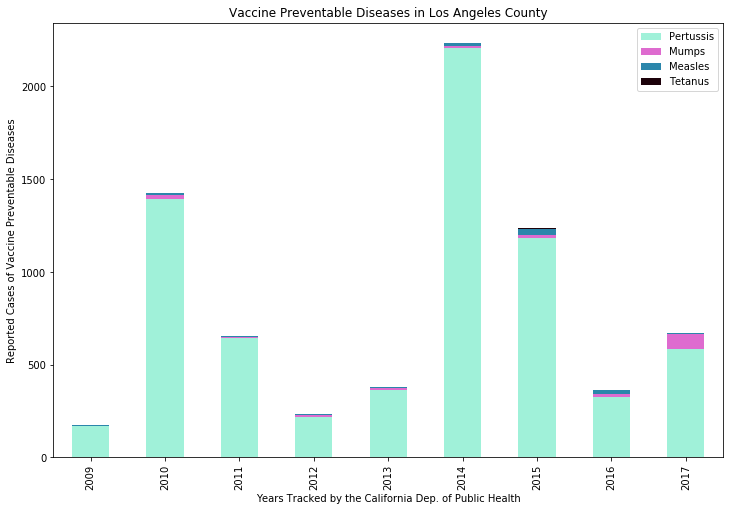

In [6]:
ct_LA = dd_complete_15.loc[dd_complete_15["county"]=="Los Angeles"]
pivLA_counties = ct_LA.pivot(index="year",columns="disease",values="count")
pivLA_counties.fillna(0, inplace=True)
pivLA_counties.head(20)
colors= ["#A0F1D9","#DE6BCF","#2B86AB","#1C010A"]
pivLA_counties.loc[:,["Pertussis","Mumps","Measles","Tetanus"]].plot.bar(stacked=True,color=colors,figsize=(12,8))
plt.title("Vaccine Preventable Diseases in Los Angeles County")
plt.xlabel("Years Tracked by the California Dep. of Public Health")
plt.ylabel("Reported Cases of Vaccine Preventable Diseases")
plt.legend(loc="best")
plt.savefig("Vaccine Preventable Diseases in Los Angeles County.png")
plt.show()

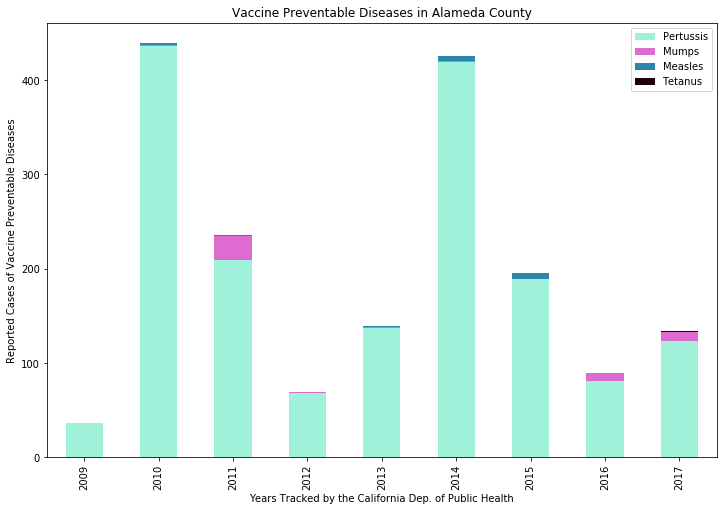

In [7]:
ct_LA = dd_complete_15.loc[dd_complete_15["county"]=="Alameda"]
pivLA_counties = ct_LA.pivot(index="year",columns="disease",values="count")
pivLA_counties.fillna(0, inplace=True)
pivLA_counties.head(20)
colors= ["#A0F1D9","#DE6BCF","#2B86AB","#1C010A"]
pivLA_counties.loc[:,["Pertussis","Mumps","Measles","Tetanus"]].plot.bar(stacked=True,color=colors,figsize=(12,8))
plt.title("Vaccine Preventable Diseases in Alameda County")
plt.xlabel("Years Tracked by the California Dep. of Public Health")
plt.ylabel("Reported Cases of Vaccine Preventable Diseases")
plt.legend(loc="best")
plt.savefig("Vaccine Preventable Diseases in Alameda County.png")
plt.show()

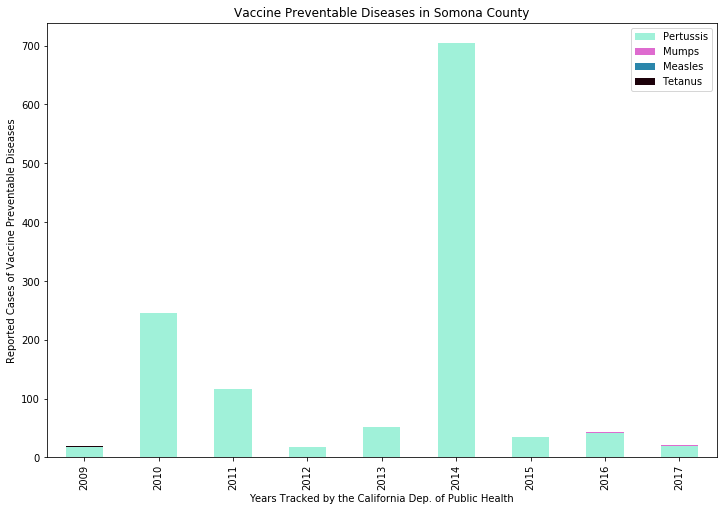

In [8]:
ct_LA = dd_complete_15.loc[dd_complete_15["county"]=="Sonoma"]
ct_LA.head()
pivLA_counties = ct_LA.pivot(index="year",columns="disease",values="count")
pivLA_counties.fillna(0, inplace=True)
#pivLA_counties.drop(["2001","2002", "2003", "2004", "2005", "2006", "2007","2008"])
pivLA_counties.head(20)
colors= ["#A0F1D9","#DE6BCF","#2B86AB","#1C010A"]
pivLA_counties.loc[:,["Pertussis","Mumps","Measles","Tetanus"]].plot.bar(stacked=True,color=colors,figsize=(12,8))
plt.title("Vaccine Preventable Diseases in Somona County")
plt.xlabel("Years Tracked by the California Dep. of Public Health")
plt.ylabel("Reported Cases of Vaccine Preventable Diseases")
plt.legend(loc="best")
plt.savefig("Vaccine Preventable Diseases in Somona County.png")
plt.show()

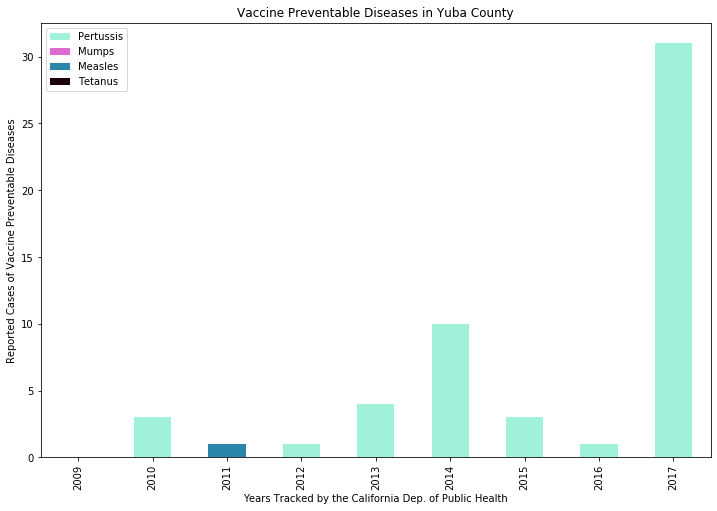

In [9]:
ct_LA = dd_complete_15.loc[dd_complete_15["county"]=="Yuba"]
pivLA_counties = ct_LA.pivot(index="year",columns="disease",values="count")
pivLA_counties.fillna(0, inplace=True)
pivLA_counties.head(20)
colors= ["#A0F1D9","#DE6BCF","#2B86AB","#1C010A"]
pivLA_counties.loc[:,["Pertussis","Mumps","Measles","Tetanus"]].plot.bar(stacked=True,color=colors,figsize=(12,8))
plt.title("Vaccine Preventable Diseases in Yuba County")
plt.xlabel("Years Tracked by the California Dep. of Public Health")
plt.ylabel("Reported Cases of Vaccine Preventable Diseases")
plt.legend(loc="best")
plt.savefig("Vaccine Preventable Diseases in Yuba County.png")
plt.show()

In [81]:
file = 'Population_Data.csv'
pop_read = pd.read_csv(file)
pop_read.head()

,County,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Alameda County,1491482,1513043,1530998,1554138,1580247,1608674,1634634,1650306,1658131,1666753
1,El Dorado County,178447,181133,180918,180578,181497,183161,184660,186082,188722,190678
2,Kern County,807407,841072,848140,853963,862557,869957,877197,882361,888988,896764
3,Los Angeles County,9848011,9822433,9876727,9938436,9998105,10048408,10097037,10120540,10118759,10105518
4,Merced County,245321,256732,259333,260971,262198,264649,266651,267971,271340,274765


In [85]:
pop_read = pop_read.replace({"County":{'Alameda County':'Alameda', 'El Dorado County':'El Dorado', 'Kern County':'Kern',
       'Los Angeles County':'Los Angeles', 'Merced County':'Merced', 'Napa County':'Napa',
       'Orange County':'Orange', 'Sacramento County':'Sacramento', 'San Diego County':'San Diego',
       'San Mateo County':'San Mateo', 'Santa Barbara County':'Santa Barbara', 'Sierra County':'Sierra',
       'Sonoma County':'Sonoma', 'Ventura County':'Ventura', 'Yuba County':'Yuba'}})
pop_read.head()
piv_pop = pop_read.set_index("County")
piv_pop_2014 = piv_pop[["2014"]]
piv_pop_2014.head()

,2014
County,
Alameda,1608674
El Dorado,183161
Kern,869957
Los Angeles,10048408
Merced,264649


In [86]:
drop_allbut_2014 = dd_complete_15.set_index("year")
drop_allbut_2014 = drop_allbut_2014.drop([2009,2010,2011,2012,2013,2015,2016,2017])
drop_allbut_2014 = drop_allbut_2014.rename(columns={"county":"County"})
drop_allbut_2014 = drop_allbut_2014.set_index("County")
drop_allbut_2014.head()

,disease,count
County,,
Alameda,Measles,6
El Dorado,Measles,0
Kern,Measles,0
Los Angeles,Measles,14
Merced,Measles,0


In [87]:
only_2014 = drop_allbut_2014.pivot(columns="disease", values="count")
only_2014.head()

disease,Measles,Mumps,Pertussis,Tetanus
County,,,,
Alameda,6,1,419,0
El Dorado,0,0,36,0
Kern,0,0,167,0
Los Angeles,14,11,2206,1
Merced,0,0,9,0


In [91]:
ct15_4d = only_2014.merge(piv_pop_2014, how="inner",left_index=True, right_index=True)
ct15_4d = ct15_4d.rename(columns={"2014":"Population"})
ct15_4d.head()

,Measles,Mumps,Pertussis,Tetanus,Population
County,,,,,
Alameda,6,1,419,0,1608674
El Dorado,0,0,36,0,183161
Kern,0,0,167,0,869957
Los Angeles,14,11,2206,1,10048408
Merced,0,0,9,0,264649


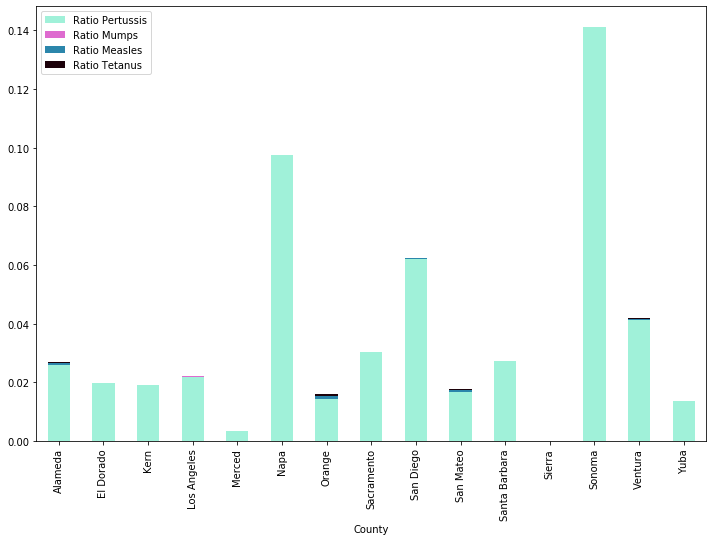

In [101]:
ct15_4d["Ratio Measles"] = (ct15_4d["Measles"]/ct15_4d["Population"])*100
ct15_4d["Ratio Mumps"] = (ct15_4d["Mumps"]/ct15_4d["Population"])*100
ct15_4d["Ratio Pertussis"] = (ct15_4d["Pertussis"]/ct15_4d["Population"])*100
ct15_4d["Ratio Tetanus"] = (ct15_4d["Measles"]/ct15_4d["Population"])*100
ct15_4d.head()
plot15 = ct15_4d.loc[:,["Ratio Pertussis","Ratio Mumps","Ratio Measles","Ratio Tetanus"]].plot.bar(stacked=True,color=colors,figsize=(12,8))
# plt.title("Vaccine Preventable Diseases in Yuba County")
# plt.xlabel("Years Tracked by the California Dep. of Public Health")
# plt.ylabel("Reported Cases of Vaccine Preventable Diseases")
# plt.legend(loc="best")
# plt.savefig("Vaccine Preventable Diseases in Yuba County.png")
# plt.show()

In [102]:
# Los Angelos (10 million)
# Alameda (1.6 million)
# Orange County ( 3.1 million)
# Sacramento (1.5 million)
# San Diego (3.3 million)
# Kern county (900,000)
# Venture (850,000)
# San Mateo (750,000)
# Sonoma (500,000)
# Santa Barbara (450,000)
# Merced (280,000)
# El Dorado (200,000)
# Napa (140,000)
# Yuba (80,000)
# Sierra County (3,000)